# Table of Contents
 <p><div class="lev2 toc-item"><a href="#drop-errorbars" data-toc-modified-id="drop-errorbars-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>drop errorbars</a></div><div class="lev2 toc-item"><a href="#detrend-(just-in-casem-uncomment-the-detrend-line-if-you-wish-to-)" data-toc-modified-id="detrend-(just-in-casem-uncomment-the-detrend-line-if-you-wish-to-)-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>detrend (just in casem uncomment the detrend line if you wish to )</a></div><div class="lev2 toc-item"><a href="#create-a-sparse-version" data-toc-modified-id="create-a-sparse-version-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>create a sparse version</a></div><div class="lev2 toc-item"><a href="#weirdest-object" data-toc-modified-id="weirdest-object-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>weirdest object</a></div>

In [158]:
__author__ = "federica b bianco - NYU 2017"
'''from a Kepler lcvs array creatse a sparse npy array by random selection'''

'from a Kepler lcvs array creatse a sparse npy array by random selection'

In [237]:
import numpy as np
import pylab as pl
import sklearn as skl

%pylab inline
pl.rcParams['figure.figsize'] = (10,10)
pl.rcParams['font.size'] = 20


Populating the interactive namespace from numpy and matplotlib


In [259]:
lcvsKep = np.load("data/KeplerSampleWErr.npy")

## drop errorbars

In [263]:
lcvsKep[:,2] = (lcvsKep[:,2,:] * 1e-4)

## detrend (just in casem uncomment the detrend line if you wish to )

In [264]:
lcvsKep[:,1].mean()

0.9994440058112144

In [265]:
trend = lcvsKep[:,1].mean(axis = 0)
#lcvsKep[:,1,:] /= trend

## create a sparse version

In [266]:
lcvsKepSparse = np.zeros((lcvsKep.shape[0], lcvsKep.shape[1], 50))

In [267]:
np.random.seed(666)

In [268]:
lcvsKepSparse = np.array([lcvsKep[i, :, np.sort(choice)].T for i,choice in enumerate(np.random.randint(0, 100, lcvsKep.shape[0]*50).reshape(lcvsKep.shape[0],50))])

In [269]:
lcvsKepSparse.shape

(2500, 3, 50)

<Container object of 3 artists>

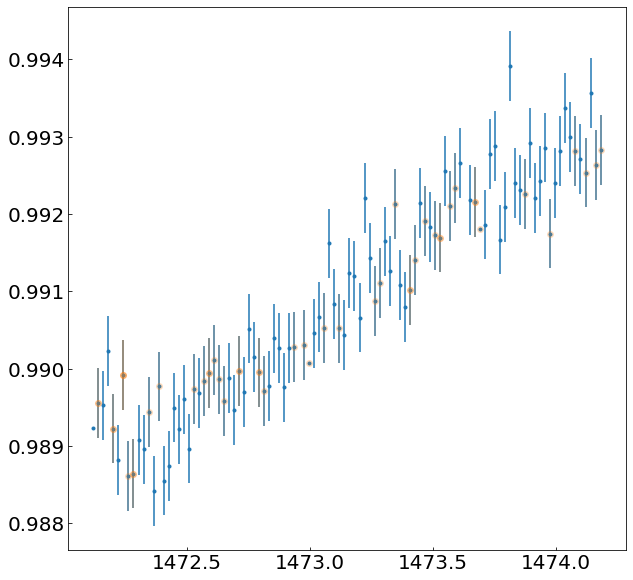

In [271]:
pl.errorbar(lcvsKep[50,0,:], lcvsKep[50,1,:], yerr=lcvsKep[50,2,:], fmt='.')

pl.errorbar(lcvsKepSparse[50,0,:], lcvsKepSparse[50,1,:], yerr=lcvsKepSparse[50,2,:], fmt='o', alpha=0.2)



In [272]:
np.save("data/KeplerSampleWErrSparse.npy", lcvsKepSparse)
np.save("data/KeplerSampleWErr_GoodErr.npy", lcvsKep)

In [273]:
indx = ((np.abs(lcvsKep[:,1,:] - trend).mean(axis=1) - (lcvsKep[:,1,:] - trend).mean(axis=1).mean()) > 2.0 * (lcvsKep[:,1,:] - trend).std(axis=1))

In [274]:
devmax = ((np.abs(lcvsKep[:,1,:] - trend).mean(axis=1) - (lcvsKep[:,1,:] - trend).mean(axis=1).mean()).max())
indxmax = ((np.abs(lcvsKep[:,1,:] - trend).mean(axis=1) - (lcvsKep[:,1,:] - trend).mean(axis=1).mean()) == devmax)

## weirdest object

Text(0,0.5,u'flux(normalized)')

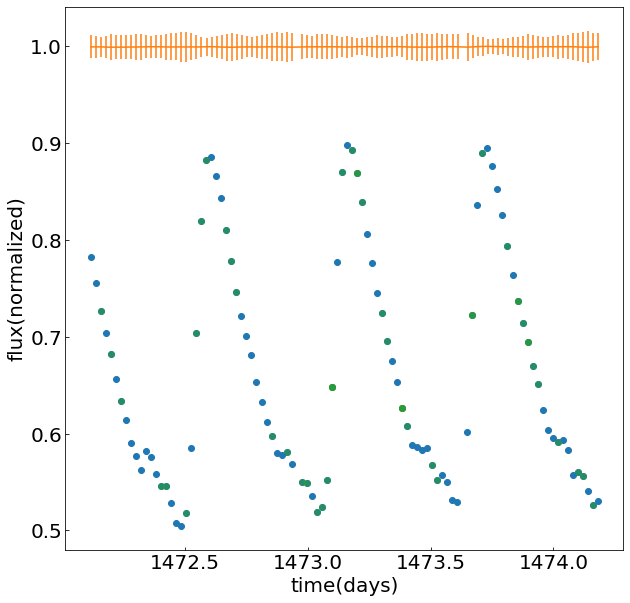

In [277]:
pl.errorbar(lcvsKep[indxmax,0,:], lcvsKep[indxmax,1,:], yerr=lcvsKep[indxmax,2,:], fmt='o')
pl.errorbar(lcvsKep[50,0,:], trend , yerr=lcvsKep[:,1].std(axis = 0), fmt='-')
pl.errorbar(lcvsKepSparse[indxmax,0,:], lcvsKepSparse[indxmax,1,:], yerr=lcvsKepSparse[indxmax,2,:] , fmt='o', alpha=0.5)
 
pl.xlabel("time(days)")
pl.ylabel("flux(normalized)")